In [26]:
import pandas as pd
import sklearn as sk
import tensorflow as tf
import numpy as np
import seaborn as sns


In [27]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [28]:
df= pd.read_csv('data.csv')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [31]:
from time import time


#convert str to date
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [32]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [33]:
df=df[df['CustomerID'].notna()]

In [34]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [35]:
from datetime import datetime
from random import triangular
start_date=pd.Timestamp(2010,12,1)
end_date=pd.Timestamp(2011,8,31)
train_set=df[df['InvoiceDate']>=start_date]
train_set=train_set[train_set['InvoiceDate']<=end_date]

In [36]:
train_set.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [37]:
start_date=pd.Timestamp(2011,9,1)
end_date=pd.Timestamp(2011,12,31)
churn_set=df[df['InvoiceDate']>=start_date]
churn_set=churn_set[churn_set['InvoiceDate']<=end_date]
churn_set.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
320705,565080,20677,PINK POLKADOT BOWL,8,2011-09-01 08:25:00,1.25,13509.0,United Kingdom
320706,565080,22128,PARTY CONES CANDY ASSORTED,24,2011-09-01 08:25:00,1.25,13509.0,United Kingdom
320708,565082,22423,REGENCY CAKESTAND 3 TIER,2,2011-09-01 09:15:00,12.75,13305.0,United Kingdom
320709,565082,15060B,FAIRY CAKE DESIGN UMBRELLA,8,2011-09-01 09:15:00,3.75,13305.0,United Kingdom
320710,565082,23245,SET OF 3 REGENCY CAKE TINS,4,2011-09-01 09:15:00,4.95,13305.0,United Kingdom


In [38]:
train_unique=train_set['CustomerID'].unique()
churn_unique=churn_set['CustomerID'].unique()
ischurnlis=[]
for id in train_unique:
    if id in churn_unique:
        ischurnlis.append(id)

In [39]:
train_set=train_set.assign(isChurn=[1 if x in ischurnlis else 0 for x in train_set['CustomerID']])

In [40]:
train_set.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,isChurn
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0


In [41]:
train_set.count()

InvoiceNo      231183
StockCode      231183
Description    231183
Quantity       231183
InvoiceDate    231183
UnitPrice      231183
CustomerID     231183
Country        231183
isChurn        231183
dtype: int64

In [42]:
#taking care of country
countries_dic={}
countries=train_set['Country'].unique()
for i,y in enumerate(countries):
    countries_dic[y]=i
countries_dic

{'United Kingdom': 0,
 'France': 1,
 'Australia': 2,
 'Netherlands': 3,
 'Germany': 4,
 'Norway': 5,
 'EIRE': 6,
 'Switzerland': 7,
 'Spain': 8,
 'Poland': 9,
 'Portugal': 10,
 'Italy': 11,
 'Belgium': 12,
 'Lithuania': 13,
 'Japan': 14,
 'Iceland': 15,
 'Channel Islands': 16,
 'Denmark': 17,
 'Cyprus': 18,
 'Sweden': 19,
 'Austria': 20,
 'Israel': 21,
 'Finland': 22,
 'Greece': 23,
 'Singapore': 24,
 'Lebanon': 25,
 'United Arab Emirates': 26,
 'Saudi Arabia': 27,
 'Czech Republic': 28,
 'Canada': 29,
 'Unspecified': 30,
 'Brazil': 31,
 'USA': 32,
 'European Community': 33,
 'Bahrain': 34,
 'Malta': 35}

In [43]:
train_set['Country']=[countries_dic[x] for x in train_set['Country']]

In [44]:
train_set['Country'].unique()
#we assign country codes instead of country names

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [45]:

train_set.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,isChurn
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,0,0


In [46]:
train_set.count()

InvoiceNo      231183
StockCode      231183
Description    231183
Quantity       231183
InvoiceDate    231183
UnitPrice      231183
CustomerID     231183
Country        231183
isChurn        231183
dtype: int64

In [47]:
train_set.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'isChurn'],
      dtype='object')

In [48]:
len(train_set['StockCode'].unique())

3412

In [49]:
train_set=train_set.drop(['Description'],axis=1)

In [50]:
#stock code has some letters
#lets remove them and use it as a feature

train_set['StockCode']=train_set['StockCode'].str.replace('\D', '')

    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [51]:
train_set=train_set[train_set['StockCode']!='']

In [52]:
train_set['StockCode']=train_set['StockCode'].astype(int)

In [53]:
train_set

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,isChurn
0,536365,85123,6,2010-12-01 08:26:00,2.55,17850.0,0,0
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,0,0
2,536365,84406,8,2010-12-01 08:26:00,2.75,17850.0,0,0
3,536365,84029,6,2010-12-01 08:26:00,3.39,17850.0,0,0
4,536365,84029,6,2010-12-01 08:26:00,3.39,17850.0,0,0
...,...,...,...,...,...,...,...,...
319395,564852,82552,10,2011-08-30 17:23:00,1.45,14976.0,0,1
319396,564852,21756,3,2011-08-30 17:23:00,5.95,14976.0,0,1
319397,564852,21908,7,2011-08-30 17:23:00,2.10,14976.0,0,1
319398,564852,22116,10,2011-08-30 17:23:00,0.79,14976.0,0,1


In [54]:
train_set['CustomerID']=train_set['CustomerID'].astype(int)

# Dropping invoice no
train_set=train_set.drop(['InvoiceNo'],axis=1)

In [55]:
#converting date to features

train_set['month']=train_set['InvoiceDate'].dt.month.astype(int)
train_set['year']=train_set['InvoiceDate'].dt.year.astype(int)
train_set['day']=train_set['InvoiceDate'].dt.day.astype(int)
train_set['hour']=train_set['InvoiceDate'].dt.hour.astype(int)

train_set=train_set.drop(['InvoiceDate'],axis=1)

In [56]:
train_set.columns

Index(['StockCode', 'Quantity', 'UnitPrice', 'CustomerID', 'Country',
       'isChurn', 'month', 'year', 'day', 'hour'],
      dtype='object')

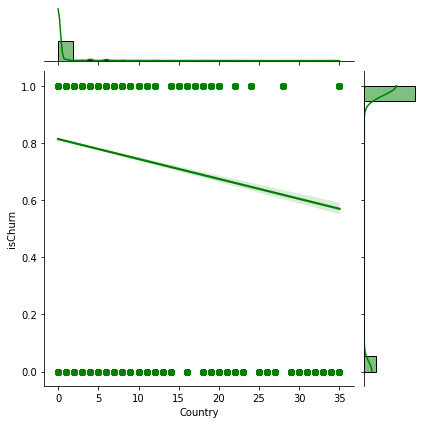

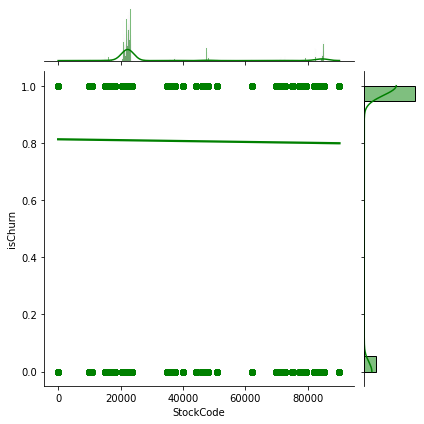

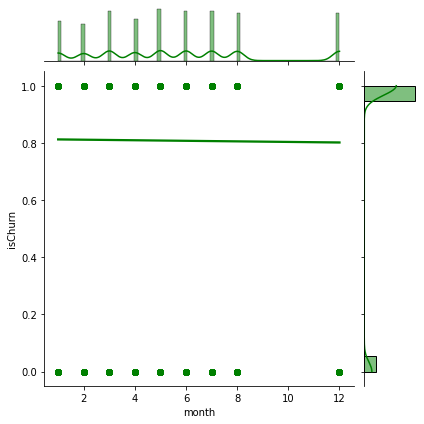

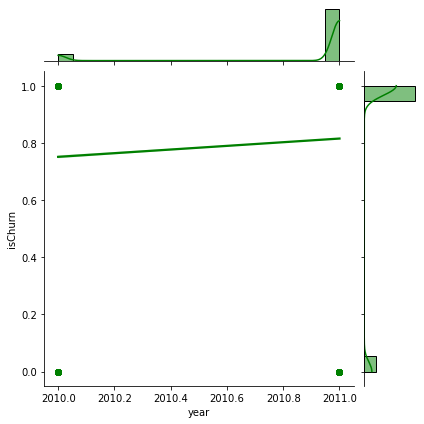

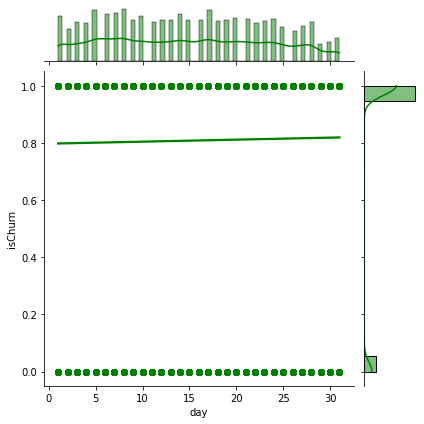

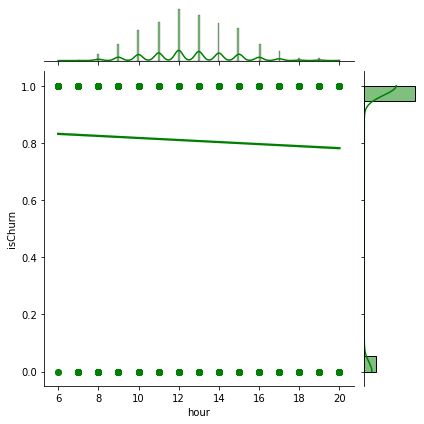

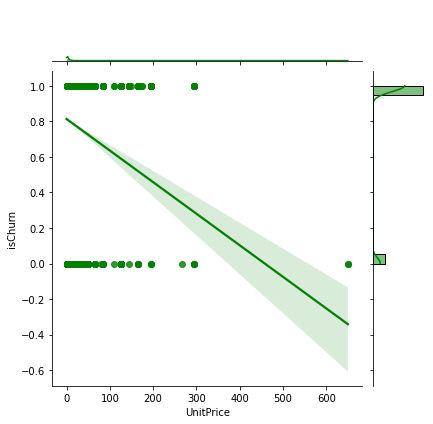

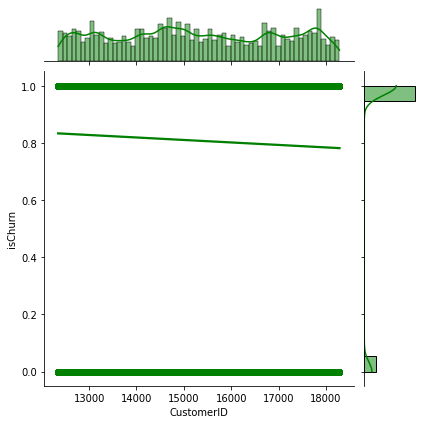

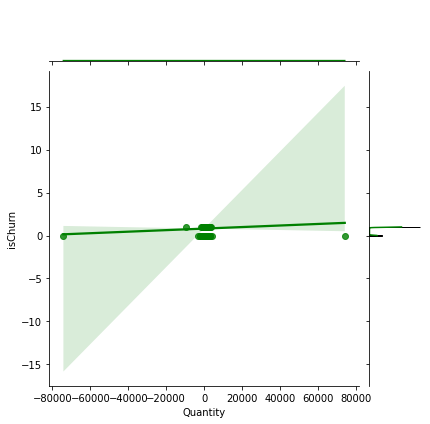

In [57]:
sns.jointplot(data=train_set, x='Country', y='isChurn', kind='reg', color='g')
sns.jointplot(data=train_set, x='StockCode', y='isChurn', kind='reg', color='g')
sns.jointplot(data=train_set, x='month', y='isChurn', kind='reg', color='g')
sns.jointplot(data=train_set, x='year', y='isChurn', kind='reg', color='g')
sns.jointplot(data=train_set, x='day', y='isChurn', kind='reg', color='g')
sns.jointplot(data=train_set, x='hour', y='isChurn', kind='reg', color='g')
sns.jointplot(data=train_set, x='UnitPrice', y='isChurn', kind='reg', color='g')
sns.jointplot(data=train_set, x='CustomerID', y='isChurn', kind='reg', color='g')
sns.jointplot(data=train_set, x='Quantity', y='isChurn', kind='reg', color='g')

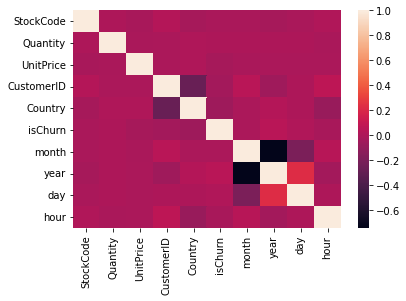

In [58]:
sns.heatmap(train_set.corr())

In [59]:
#normalising train set
from hmac import trans_36
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler1=StandardScaler()
scaler2=MinMaxScaler()

train_set['StockCode']=scaler2.fit_transform(train_set[['StockCode']])
train_set['CustomerID']=scaler2.fit_transform(train_set[['CustomerID']])
train_set['Country']=scaler2.fit_transform(train_set[['Country']])

train_set['Quantity']=scaler1.fit_transform(train_set[['Quantity']])
train_set['UnitPrice']=scaler1.fit_transform(train_set[['UnitPrice']])
train_set['month']=scaler1.fit_transform(train_set[['month']])
train_set['year']=scaler1.fit_transform(train_set[['year']])
train_set['day']=scaler1.fit_transform(train_set[['day']])
train_set['hour']=scaler1.fit_transform(train_set[['hour']])


#dropping useless cols
train_set=train_set.drop(['year'],axis=1)


train_set


,StockCode,Quantity,UnitPrice,CustomerID,Country,isChurn,month,day,hour
0,0.943566,-0.029790,-0.091041,0.926443,0.0,0,2.050745,-1.649149,-2.013723
1,0.787600,-0.029790,0.069807,0.926443,0.0,0,2.050745,-1.649149,-2.013723
2,0.935618,-0.020883,-0.052744,0.926443,0.0,0,2.050745,-1.649149,-2.013723
3,0.931439,-0.029790,0.069807,0.926443,0.0,0,2.050745,-1.649149,-2.013723
4,0.931439,-0.029790,0.069807,0.926443,0.0,0,2.050745,-1.649149,-2.013723
...,...,...,...,...,...,...,...,...,...
319395,0.915067,-0.011977,-0.301675,0.442686,0.0,1,0.781881,1.797567,1.879415
319396,0.241143,-0.043149,0.560010,0.442686,0.0,1,0.781881,1.797567,1.879415
319397,0.242828,-0.025336,-0.177209,0.442686,0.0,1,0.781881,1.797567,1.879415
319398,0.245134,-0.011977,-0.428055,0.442686,0.0,1,0.781881,1.797567,1.879415


In [60]:
y=train_set['isChurn']
x=train_set.drop(['isChurn'],axis=1)

In [61]:
#dividing data set into train test and dev
#80/20
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [62]:
#80/20
X_train,X_val,y_train,y_val = sk.model_selection.train_test_split(X_train,y_train,test_size=0.2,random_state=1)

In [63]:
#decision Tree

from sklearn.tree import DecisionTreeClassifier

model1=DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [64]:
y_pred = model1.predict(X_test)

In [65]:
#evaluating decision tree
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8533   267]
 [  301 36925]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8800
           1       0.99      0.99      0.99     37226

    accuracy                           0.99     46026
   macro avg       0.98      0.98      0.98     46026
weighted avg       0.99      0.99      0.99     46026



In [66]:
#SVM
from sklearn.svm import LinearSVC

model2=LinearSVC(max_iter=5000,verbose=True)
model2.fit(X_train,y_train)

[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(max_iter=5000, verbose=True)

In [67]:
y_pred = model2.predict(X_test)

In [68]:
#evaluating SVM
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   24  8776]
 [   15 37211]]
              precision    recall  f1-score   support

           0       0.62      0.00      0.01      8800
           1       0.81      1.00      0.89     37226

    accuracy                           0.81     46026
   macro avg       0.71      0.50      0.45     46026
weighted avg       0.77      0.81      0.72     46026



In [69]:
#ANN
from sklearn.neural_network import MLPClassifier

model3=MLPClassifier(max_iter=5000,verbose=True)
model3.fit(X_train,y_train)

Iteration 1, loss = 0.48819269
Iteration 2, loss = 0.47911344
Iteration 3, loss = 0.47728599
Iteration 4, loss = 0.47595013
Iteration 5, loss = 0.47459803
Iteration 6, loss = 0.47344241
Iteration 7, loss = 0.47239762
Iteration 8, loss = 0.47136346
Iteration 9, loss = 0.47067658
Iteration 10, loss = 0.46968595
Iteration 11, loss = 0.46874711
Iteration 12, loss = 0.46810354
Iteration 13, loss = 0.46717371
Iteration 14, loss = 0.46662701
Iteration 15, loss = 0.46585983
Iteration 16, loss = 0.46516027
Iteration 17, loss = 0.46480784
Iteration 18, loss = 0.46430743
Iteration 19, loss = 0.46356023
Iteration 20, loss = 0.46305324
Iteration 21, loss = 0.46255185
Iteration 22, loss = 0.46193209
Iteration 23, loss = 0.46152185
Iteration 24, loss = 0.46131876
Iteration 25, loss = 0.46086200
Iteration 26, loss = 0.46061832
Iteration 27, loss = 0.45987702
Iteration 28, loss = 0.45944105
Iteration 29, loss = 0.45929477
Iteration 30, loss = 0.45880365
Iteration 31, loss = 0.45823817
Iteration 32, los

MLPClassifier(max_iter=5000, verbose=True)

In [70]:
y_pred = model3.predict(X_test)

In [71]:
#evaluating neural network
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 1584  7216]
 [ 1165 36061]]
              precision    recall  f1-score   support

           0       0.58      0.18      0.27      8800
           1       0.83      0.97      0.90     37226

    accuracy                           0.82     46026
   macro avg       0.70      0.57      0.59     46026
weighted avg       0.78      0.82      0.78     46026

